In [1]:
import yaml

In [2]:
pubs = yaml.load(open("yaml/publications.yaml"), Loader=yaml.CLoader)

In [3]:
types = {}
for v in pubs:
    if v['TYPE'] not in types:
        types[v['TYPE']] = {}
    if v['YEAR'] not in types[v['TYPE']]:
        types[v['TYPE']][v['YEAR']] = 0
    types[v['TYPE']][v['YEAR']] += 1

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Text(0.5, 1.0, 'Stacked Plot of Venues by Year')

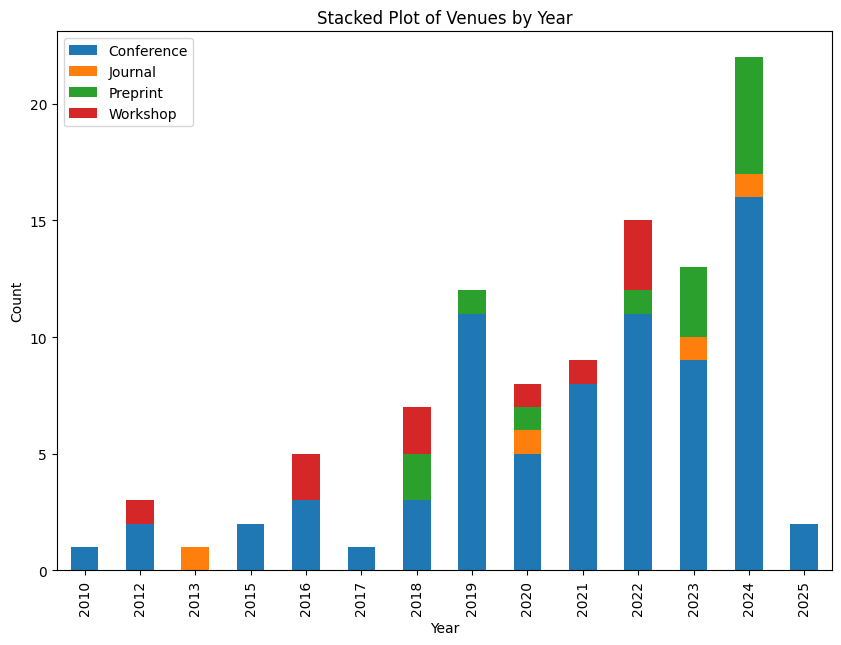

In [5]:
df = pd.DataFrame(types).T
df = df.fillna(0)
df.columns = df.columns.map(int)
df = df.sort_index(axis=1)
df = df.sort_index(axis=0)
ax = df.T.plot(kind='bar', stacked=True, figsize=(10, 7))
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Stacked Plot of Venues by Year')

In [6]:
cats = {}
for v in pubs:
    if v['FIELD'] not in cats:
        cats[v['FIELD']] = {}
    if v['YEAR'] not in cats[v['FIELD']]:
        cats[v['FIELD']][v['YEAR']] = 0
    cats[v['FIELD']][v['YEAR']] += 1
df = pd.DataFrame(cats).T

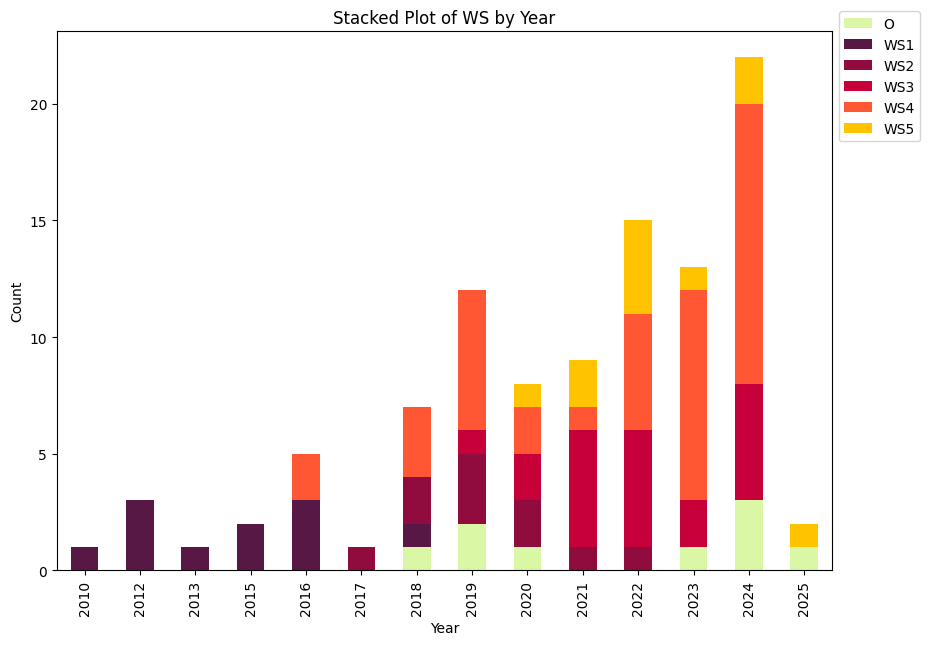

In [7]:

#df = df.div(df.sum(axis=0), axis=1)
df = df.fillna(0)
df.columns = df.columns.map(int)
df = df.sort_index(axis=1)
df = df.sort_index(axis=0)
colors = ["#DAF7A6","#581845", "#900C3F", "#C70039", "#FF5733", "#FFC300"]  # Specify desired colors in order
ax = df.T.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)
ax.set_xlabel('Year')
#ax.set_ylabel('Percent')
ax.set_ylabel('Count')
ax.set_title('Stacked Plot of WS by Year')
ax.legend(bbox_to_anchor=(1,1.05))

In [8]:
comm = {}
M = {'AAAI':'AI/ML', 'ICLR': 'AI/ML', 'ICML': 'AI/ML', 'NeurIPS': 'AI/ML', 'NeurIPS Challenge': 'AI/ML', 'PMLR': 'AI/ML', 'TMLR': 'AI/ML',
     'ACL': 'NLP', 'ACL Findings': 'NLP', 'ACL Short': 'NLP', 'EACL': 'NLP', 'EMNLP': 'NLP', 'EMNLP Findings': 'NLP', 'EMNLP-IJCNLP': 'NLP',
     'TACL': 'NLP', 'NAACL': 'NLP', 'NAACL Short': 'NLP', 'Coling': 'NLP', 'CoNLL': 'NLP',  'IJCNLP': 'NLP', 'COLM': 'NLP', 'CIKM': 'NLP',
     'CVPR': 'CV', 'ICCV': 'CV', 'ECCV': 'CV',
     'CoRL': 'Robo', 'ICRA': 'Robo', 'IROS': 'Robo', 'RSS': 'Robo', 'RA-L': 'Robo'
    }
for v in pubs:
    if v['TYPE'] != 'Preprint' and v['TYPE'] != 'Workshop':
        community = M[v['VENUE-ACR']] if v['VENUE-ACR'] in M else v['VENUE-ACR']
        if community not in comm:
            comm[community] = {}
        if v['YEAR'] not in comm[community]:
            comm[community][v['YEAR']] = 0
        comm[community][v['YEAR']] += 1

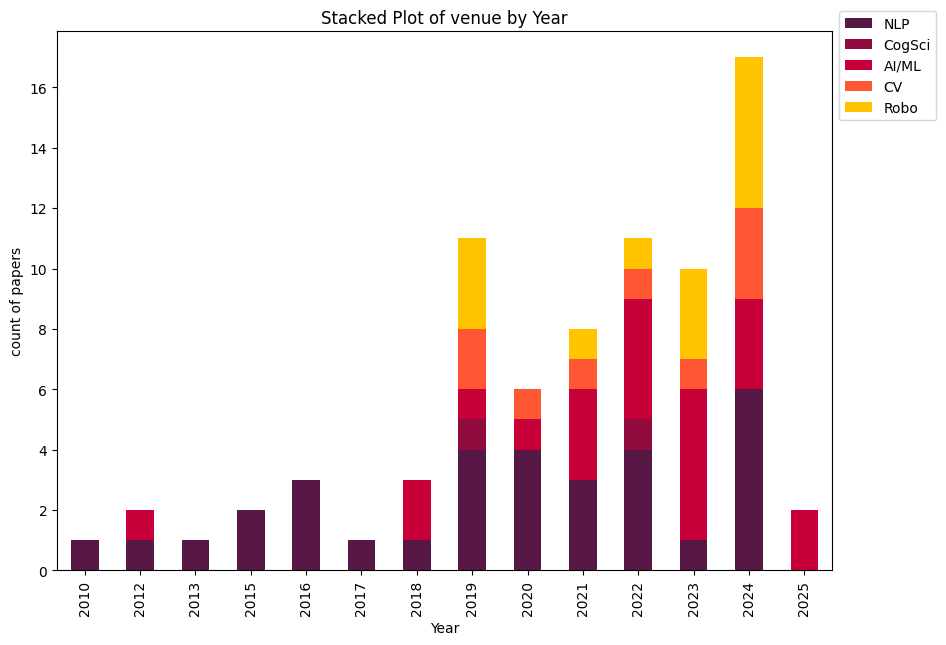

In [9]:
df = pd.DataFrame(comm).T
#df = df.div(df.sum(axis=0), axis=1)
df = df.fillna(0)
df.columns = df.columns.map(int)
df = df.sort_index(axis=1)
df = df.sort_index(axis=0)

category_order = ['NLP', 'CogSci', 'AI/ML', 'CV', 'Robo']
df = df.loc[category_order]


colors = ["#581845", "#900C3F", "#C70039", "#FF5733", "#FFC300", "#DAF7A6"]  # Specify desired colors in order
ax = df.T.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)
ax.set_xlabel('Year')
ax.set_ylabel('count of papers')
ax.set_title('Stacked Plot of venue by Year')
ax.legend(bbox_to_anchor=(1,1.05))

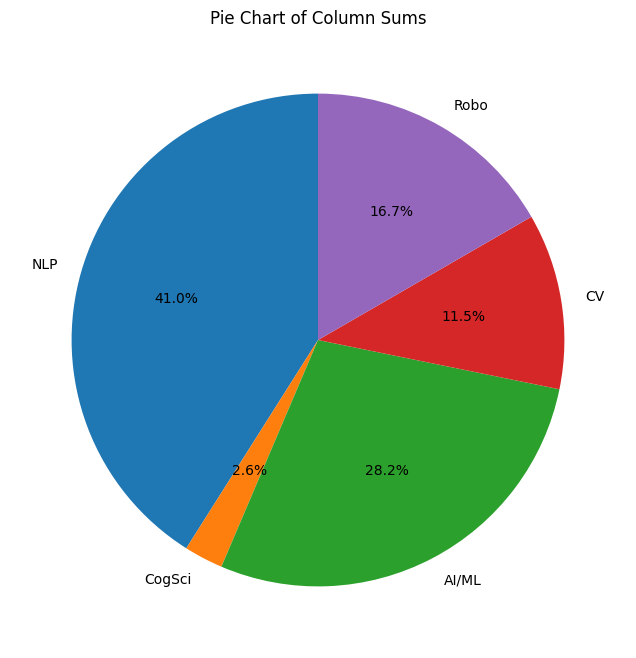

In [10]:
column_sums = df.sum(axis=1)
plt.figure(figsize=(8, 8))
plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Column Sums")
plt.show()

In [11]:
comm = {}
for v in pubs:
    if v['TYPE'] != 'Preprint' and v['TYPE'] != 'Workshop':
        community = v['VENUE-ACR']
        if community not in comm:
            comm[community] = {}
        if v['YEAR'] not in comm[community]:
            comm[community][v['YEAR']] = 0
        comm[community][v['YEAR']] += 1

In [12]:
df = pd.DataFrame(comm).T
#df = df.div(df.sum(axis=0), axis=1)
df = df.fillna(0)
df.columns = df.columns.map(int)
df = df.sort_index(axis=1)
df = df.sort_index(axis=0)

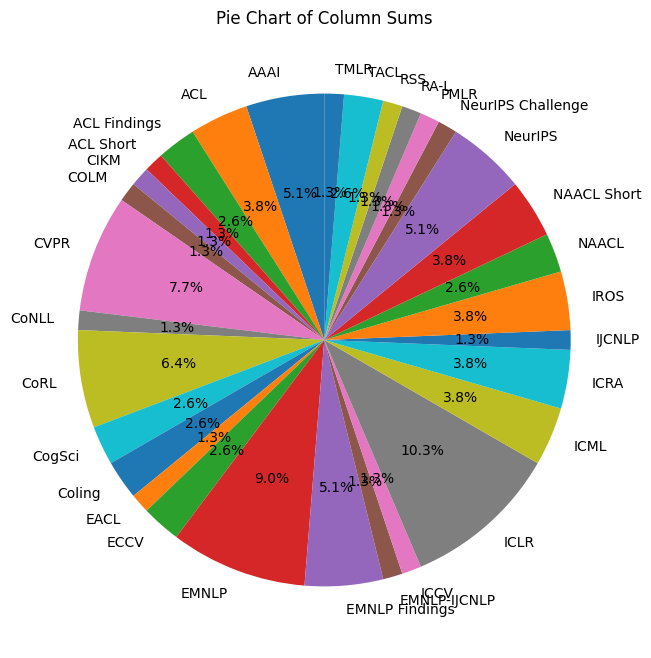

In [13]:
column_sums = df.sum(axis=1)
plt.figure(figsize=(8, 8))
plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Column Sums")
plt.show()

In [14]:
from collections import Counter
authors = []
for pub in pubs:
    if pub['TYPE'] != "Workshop" and pub['TYPE'] != "Preprint":
        authors += pub["AUTHORS"]
counts = Counter(authors)
V = [(counts[a],a) for a in counts if a != "Yonatan Bisk"]
V.sort()
V.reverse()
for c,a in V[:20]:
    print(f"{a:25} {c}")

Yejin Choi                12
Hao Zhu                   10
Graham Neubig             10
So Yeon Min               8
Jianfeng Gao              8
Yingshan Chang            7
Julia Hockenmaier         7
Jesse Thomason            7
Vidhi Jain                6
Ruslan Salakhutdinov      6
Chris Paxton              6
Rowan Zellers             5
Roozbeh Mottaghi          4
Devendra Singh Chaplot    4
Ari Holtzman              4
Ali Farhadi               4
Tsung-Yen Yang            3
Sriram Yenamandra         3
Mohit Shridhar            3
Karmesh Yadav             3
